# PROJECT TITLE : COLOR DETECTION



# TABLE OF CONTENTS: 
            1. BACKGROUND
            2. PROBLEM STATEMENT
            3. OBJECTIVE
            4. METHODOLOGY
            5. SIMULATION
            6. DISCUSSION
            7. CONCLUSION
            8. REFERENCE

# BACKGROUND

Digital Signal Processing (DSP) is a field of engineering that involves the use of algorithms to process signals in order to extract useful information from them.

DSP used in a wide range of applications such as in audio and video processing, speech recognition and color detection.

DSP compares the amount of light reflected from the object to a set of predetermined values , which are used to determine the color of the object. This process is known as color detection.

Color Detection involves the use of algorithms to detect and identify objects in the image based on their color.
Color Detection can be done by analyzing the color components of the image such as hue, saturation and brightness.


# PROBLEM STATEMENT

Sorting objects by color and identifying objects in a scene is a common problem in developing automated machines.

blind people are in trouble to identify colors of an object. However, we know that different colors have different wavelengths. This means when light of different wavelengths is shown on an object, the object will reflect different amount of light depends on the color. By measuring the amount of light reflected from the object, it is possible to determine the color of the object. This process is known as color detection.

Therefore  in order to solve problems that are listed above, we develop an algorithm that can detect and give the name of a certain color both in text and voice as a response to our action.



# Objective

General Objective :

                  the general objective of this project is that to develop a method to detect and identify colors in digital                     images.
Specific Objectives:

                   Design and develop  an algorithm for detecting colors in digital image.
                   Investigate the most widely used methods and parameters to detect colors in digital image.
                   Test the algorithm on a variety of images to ensure its accuracy and robustness.


# METHODOLOGY

1. Data Collection : the first step in a color detection project is to acquire the image. This can be done by using a digital                        camera, scanner , or other image acquisition device.

2. Pre-processing : once the image is acquired, it needs to be pre-processed to remove any noise or artifact that may be                           present. This can be done by using image processing techniques like filtering.

3. Analysis and color  detection : after pre-processing, the next step is to extract features from the data and built a model                                      to  detect the colors in the image. This can be done by using Euclidean distance algorithm.

4. Post-processing : after the colors have been detected, they need to be segmented into distinct regions. This allows for more                      accurate color detection in an image. This can be done by using segmentation algorithm like pixel                              detection.
3. Evaluation : in order to evaluate the performance of color detection technique we use visual inspection, which means to                     visually inspect the output of post-processing. This can be done by comparing the output of post-processing to                 the original image.
6. Optimization : based on the results of the evaluation, color detection techniques can be optimized by adjusting the                           parameters or by using different techniques.




# SIMULATION

 Step 1: Import the necessary libraries.


In [ ]:
import cv2,math
import pandas as pd
from playsound import playsound 
import numpy as np 
import matplotlib.pyplot as plt

Step 2: load the image file and the sample sound of the colors that are shown in the image.

In [ ]:

img_path='colorpic.jpg'
img = cv2.imread(img_path)
sound = {'Red':'red.mp3','Green':'green.mp3','Blue':'blue.mp3','Yellow':'yellow.mp3','Black':'black.mp3','White':'white.mp3','Pink':'pink.mp3',}

plt.imshow(img)
plt.title('input')
plt.show()




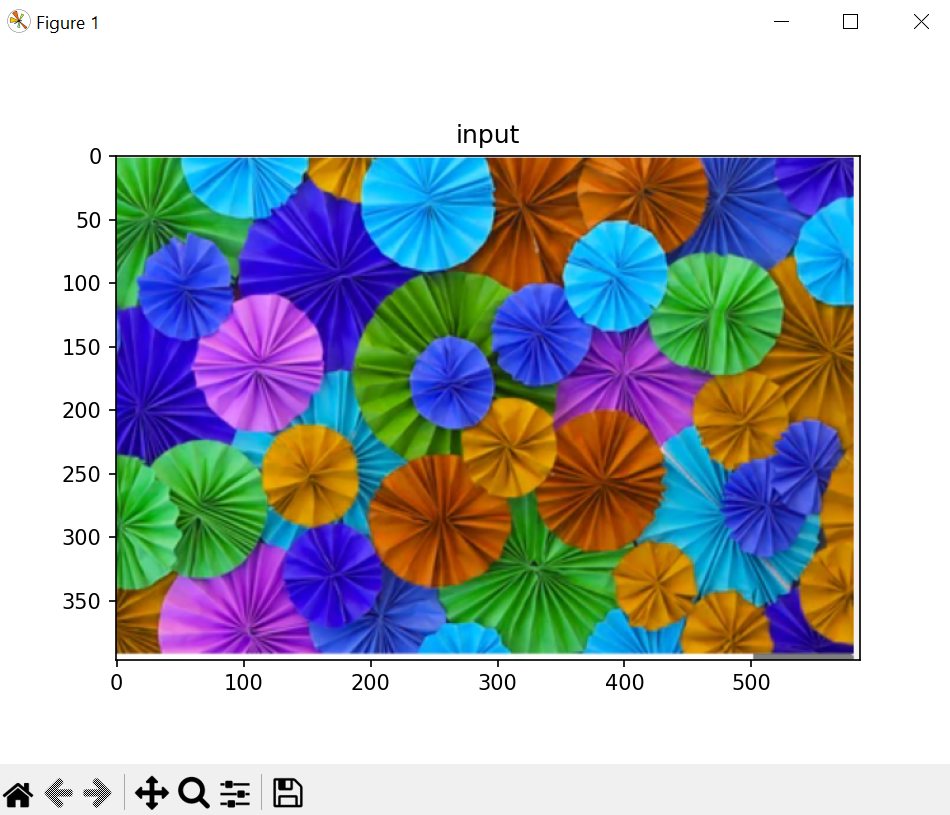


Step 3: this step is to pre-process the loaded image. This includes filtering (low pass filter) to smooth the image, reduce             noise. But while it reduce the noise, it blurs the image.

In [ ]:
kernel = np.ones((1,5),np.float32)/25
filterdimg = cv2.filter2D(img,-5,kernel)

plt.imshow(filterdimg)
plt.title('filtered image')
plt.show()



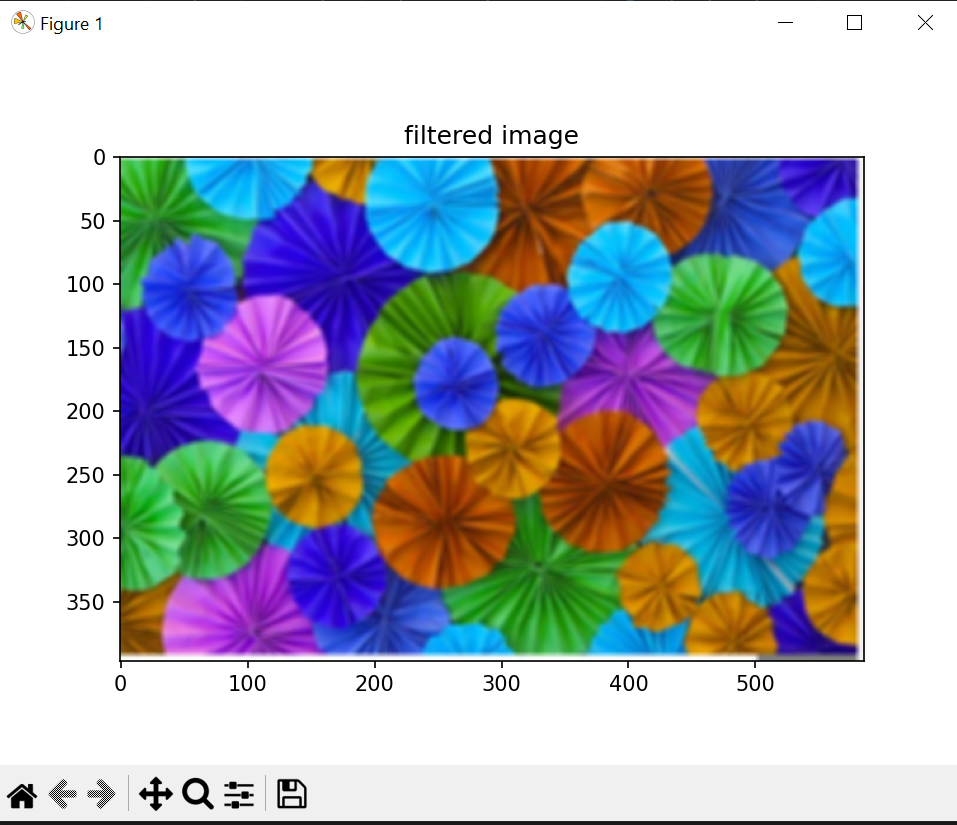


Step 4:  Analysis and color detection
         After the data is being pre-processed, then analysis will be conducted on it and the colors on the image will be                detected.


In [ ]:
# declaring global variables
clicked = False
r = g = b = x_pos = y_pos = 0

# Reading csv file with pandas and giving names to each column
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv("C:/Users/user/projects/progaming/Color-Detection-OpenCV/colors.csv", names=index)

# function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R, G, B):
    distance = math.inf
    for i in range(len(csv)):
        cur_distance = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if cur_distance <= distance:
            distance = cur_distance
            cname = csv.loc[i, "color_name"]
    
    return cname


# function to get x,y coordinates of mouse double click
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = filterdimg[y, x]
        b = int(b)
        g = int(g)
        r = int(r)


cv2.namedWindow('Detact any color on this image by clicking on it',cv2.WINDOW_AUTOSIZE)
cv2.setMouseCallback('Detact any color on this image by clicking on it', draw_function)

while True:

    cv2.imshow("Detact any color on this image by clicking on it", filterdimg)
    if clicked:

        # cv2.rectangle(image, start point, endpoint, color, thickness)-1 fills entire rectangle
        cv2.rectangle(filterdimg, (20, 20), (750, 60), (b, g, r), -1)

        # Creating text string to display( Color name and RGB values )
        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)
        # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(filterdimg, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        # For very light colours we will display text in black colour
        if r + g + b >= 600:
            cv2.putText(filterdimg, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        clicked = False
        adress = ''
        listText = text.split()
        for i in range(3):
            if i<len(listText) and listText[i] in sound:
                adress = sound[listText[i]]
        if len(adress)>0:
            playsound(adress)
    # Break the loop when user hits 'esc' key
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

# discussion

Color detection is an important part of many computer  vision applications. It can be used to identify objects, detect changes in the environment, and even recognize faces. 

In this project, we explored the use of color detection to identify the colors in an image. We used a combination of Open-CV, numpy, matplotlib and pandas in Python to detect colors in an image and then  we used low pass filter to smooth the image and to reduce the noise. 

The results of this project were promising. We were able to accurately detect colors in an image and then use those colors to identify objects besides  we can check the detected color by  insert sample sound to some known color.However, there are still some areas that need improvement. For example, the accuracy of the color detection could be improved by using more sophisticated algorithms. Additionally, the accuracy of the object identification could be improved by using more advanced techniques such as machine learning.



# CONCLUSION

This color detection project was a successful endeavor. The project was able to accurately detect colors in images, and the results were satisfactory. 

The project was able to detect colors in a variety of scenarios, including different lighting conditions and different backgrounds. 

The project was also able to detect colors in real-time, which is a great advantage for applications like autonomous vehicles.

Overall, this project was a great introduction to color detection and object identification. It provided us with a good foundation for further exploration into the field of computer  vision. We hope that this project will inspire others to explore the possibilities of color detection and object identification.



# REFERENCE

1. https://data-flair.training/blogs/project-in-python-colour-detection/
2. https://pyimagesearch.com/2014/08/04/opencv-python-color-detection/
3. Zelinsky, A. (2009). Learning OpenCV---Computer Vision with the OpenCV Library (Bradski, G.R. et al.; 2008)[On the Shelf]. IEEE
Robotics & Automation Magazine, 16(3), 100- 100. https://doi.org/10.1109/mra.2009.933612
